In [21]:
import numpy as np 
import random
import matplotlib.pyplot as plt
import os.path as op

In [22]:
arr_dir = "../Data/3D_map/Map_array"
pic_dir = "../Data/3D_map/Map_pictures"
num_workspace = 120
np.random.seed(23)

In [23]:
def generate_3D_map(map_size=20, num_config=16000, maz_id=0):
    maz = np.zeros((map_size, map_size, map_size))
    obs_style = [[5,5,5], [3,5,5], [7,7,7], [5,5,3],[5,3,5], [3,3,7], [3,7,3],[7,3,3]]
    obs_num = 8
    obs_pos = np.random.randint(low=2, high=12, size=(obs_num, 3)) #XXXXX
    obs_pos = [[0,0,0],[0,8,0],[0]]
    obs_bound = np.zeros((obs_num, 6))
    
    for i in range(obs_pos.shape[0]):
        x,y,z = obs_pos[i]
        random_style = random.randint(0, len(obs_style)-1)
        
        w, h, d = obs_style[random_style]
        maz[x:x+w, y:y+h, z:z+d] = 255
        obs_bound[i, 0] = x
        obs_bound[i, 1] = y
        obs_bound[i, 2] = z
        obs_bound[i, 3] = x+w
        obs_bound[i, 4] = y+h
        obs_bound[i, 5] = z+d
    def generate_sg(nc, space, map_size):
        s_g_mat = []
        for i in range(nc):
            while True:
                s_pos = np.random.randint(low=0, high=map_size-1, size=(3)) 
                g_pos = np.random.randint(low=0, high=map_size-1, size=(3)) 
                if space[s_pos[0],s_pos[1],s_pos[2]] == 255 or space[g_pos[0],g_pos[1],g_pos[2]] == 255 or np.sum(np.absolute(s_pos - g_pos)) < 21:
                    continue
                flag = True
#                 eight_dir = np.array([[-2,-2,-2],[2,-2,-2],[-2,2,-2],[-2,-2,2],[2,2,-2],[2,-2,2],[-2,2,2],[2,2,2]])
                eight_dir = np.array([[-1,-1,-1],[1,-1,-1],[-1,1,-1],[-1,-1,1],[1,1,-1],[1,-1,1],[-1,1,1],[1,1,1]])
                for direction in eight_dir:
                    tmp_s_pos = direction + s_pos
                    tmp_g_pos = direction + g_pos
                if all(tmp_s_pos >=0) and all(tmp_s_pos <=19) and space[tmp_s_pos[0], tmp_s_pos[1], tmp_s_pos[2]] == 255:
                    flag = False
                if all(tmp_g_pos >=0) and all(tmp_g_pos <=19) and space[tmp_g_pos[0], tmp_g_pos[1], tmp_g_pos[2]] == 255:
                    flag = False
                if flag:
                    break
            s_g_mat.append(np.concatenate((s_pos, g_pos), axis=None))
        return np.stack(s_g_mat)
#     save_maz(maz, maz_id)
    s_g_maz = generate_sg(num_config, maz, map_size)

    return maz, s_g_maz, obs_bound
                    
        
    
    
    
    

In [24]:
def save_maz(maz, i):
    plt.imsave(op.join(pic_dir, '{}.png'.format(i)), maz)#, cmap='gray')

In [25]:
total_maz = []
total_config = []
total_obs = []
for i in range(100):
    print ('generating map', i)
    maz, s_g_confg, obs = generate_3D_map(20, 1000, i)
    total_maz.append(maz)
    total_config.append(s_g_confg)
    total_obs.append(obs)
print ('total_config', total_config)
total_config = np.stack(total_config)
train_config = total_config[:,:800,:]
test_seen_config = total_config[:,800:,:]

test_unseen_config = []
for i in range(100, 120):
    print ('generating map', i)
    maz, s_g_confg, obs = generate_3D_map(20, 400, i) #XXXXX
    total_maz.append(maz)
    test_unseen_config.append(s_g_confg)
    total_obs.append(obs)

total_maz = np.stack(total_maz)
test_unseen_config = np.stack(test_unseen_config)
total_obs = np.stack(total_obs)

total_maz = total_maz.astype(np.float32)
train_config = train_config.astype(np.int32)
test_seen_config = test_seen_config.astype(np.int32)
test_unseen_config = test_unseen_config.astype(np.int32)
total_obs = total_obs.astype(np.int32)

print ('Saving the numpy array...')
np.save(op.join(arr_dir, 'maz.npy'), total_maz)
np.save(op.join(arr_dir, 'train_config.npy'), train_config)
np.save(op.join(arr_dir, 'test_seen_config.npy'), test_seen_config)
np.save(op.join(arr_dir, 'test_unseen_config.npy'), test_unseen_config)
np.save(op.join(arr_dir, 'obs.npy'), total_obs)
    

generating map 0
generating map 1
generating map 2
generating map 3
generating map 4
generating map 5
generating map 6
generating map 7
generating map 8
generating map 9
generating map 10
generating map 11
generating map 12
generating map 13
generating map 14
generating map 15
generating map 16
generating map 17
generating map 18
generating map 19
generating map 20
generating map 21
generating map 22
generating map 23
generating map 24
generating map 25
generating map 26
generating map 27
generating map 28
generating map 29
generating map 30
generating map 31
generating map 32
generating map 33
generating map 34
generating map 35
generating map 36
generating map 37
generating map 38
generating map 39
generating map 40
generating map 41
generating map 42
generating map 43
generating map 44
generating map 45
generating map 46
generating map 47
generating map 48
generating map 49
generating map 50
generating map 51
generating map 52
generating map 53
generating map 54
generating map 55
ge

generating map 102
generating map 103
generating map 104
generating map 105
generating map 106
generating map 107
generating map 108
generating map 109
generating map 110
generating map 111
generating map 112
generating map 113
generating map 114
generating map 115
generating map 116
generating map 117
generating map 118
generating map 119
Saving the numpy array...


In [26]:
print ('total_maz', total_maz.shape)
print ('train_config', train_config.shape)
print ('total_obs', total_obs.shape)
print (train_config[1,6])
print (total_maz[0,16,2,3], total_maz[0,3,12,5])

total_maz (120, 20, 20, 20)
train_config (100, 800, 6)
total_obs (120, 8, 6)
[ 3 18  4 18  1 15]
0.0 0.0


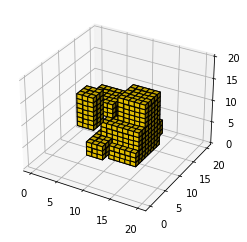

In [27]:
import matplotlib.pyplot as plt
import numpy as np


map_id = 0
env = total_maz[map_id]
# env = env/255
env = env==255
# print (env)
# prepare some coordinates
x, y, z = np.indices((32,32,32))

# draw cuboids in the top left and bottom right corners, and a link between
# them
# cube1 = (x < 3) & (y < 3) & (z < 3)
# cube2 = (x >= 5) & (y >= 5) & (z >= 5)
# link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
# voxels = cube1 | cube2 | link
# print(voxels)

# set the colors of each object
colors = np.empty(env.shape, dtype=object)
colors[env] = 'gold'
# colors[cube1] = 'blue'
# colors[cube2] = 'green'

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(env, facecolors=colors, edgecolor='k')

plt.show()